# Using Boxplots

In [1]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Questions

1. Use a boxplot to show the distribution of household income in the Jupiter study area, 
   by number of automobiles owned.  What is the median income of households who own 
   exactly two automobiles?  *(Hint: the correct answer is \$96 thousand.)*
2. Is the median income higher or lower if we only consider two-car households that
   have at least one person over age 65?  Create a set of box plots similar to those
   created in question (1), but only for households with at least one person over age 65.

## Data

To answer the questions, use the following data files:

In [2]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [3]:
person = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'))
person.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0


## Solution

To answer the first question, we create a boxplot using two columns in `hh` dataframe : `income` and `autos`. But before that, let's filter the records to remove those where incomes are reported as zero or unavailable. 

In [4]:
hh = hh[(hh.income > 0) & (hh.income != 0)]

The we can draw the boxplot.  

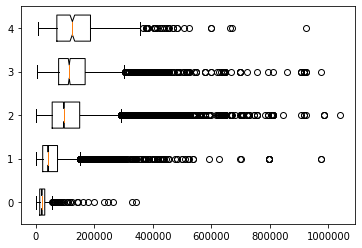

In [5]:
hh_box_1 = list(hh.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_1], 
    vert = False, 
    labels = [i[0] for i in hh_box_1], 
    notch = True, 
    widths = 0.6,
);

This is a bit hard to read, as the long tails of very high income households are filling up the figure.
We can fix this by clipping the x-axis range, and we can also add some labels to explain what
we're looking at.

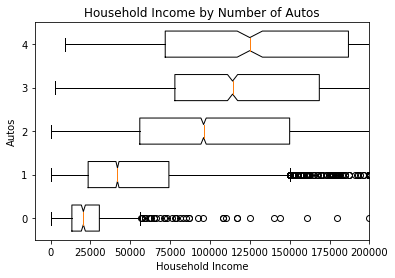

In [6]:
plt.boxplot(
    [i[1] for i in hh_box_1], 
    vert = False, 
    labels = [i[0] for i in hh_box_1], 
    notch = True, 
    widths = 0.6,
)
plt.xlim(-10000, 200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');

From this figure, we can more clearly see the median income of households with 2 autos is slightly lower 
than \$100,000. The actual value of \$96,000 can be found more exactly using the `median` function.

In [7]:
np.median(hh[hh.autos == 2].income)

96000.0

Now, let's move on to the second question. First, we use `person` dataframe to calculate total maximum age for each household using the `.groupby()` method. 

In [8]:
max_age = person.groupby(['hh_id'])['age'].max().rename('max_age')

Then, we merge the ages with household information 
to obtain our final dataset and perform some basic 
filtering to satisfy the conditions. 

In [9]:
hh_2 = pd.merge(hh, max_age, on='hh_id', how='left')
hh_2 = hh_2[(hh_2.max_age > 65) & (hh_2.income > 0)]

In [10]:
hh_2.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb,max_age
9,426638,1690921,7736,329000,2,0,NN0,0,0,0,84
12,426641,1690904,7736,169750,2,1,MM0,0,0,0,66
20,426649,1690940,7736,22300,1,0,MHM0,0,0,0,68
21,426650,1690965,7736,427400,3,1,NMj,13,0,0,74
28,426657,1691054,7737,289000,3,1,NNj,4,0,0,67


We are now ready to prepare the boxplot and find the answer. 

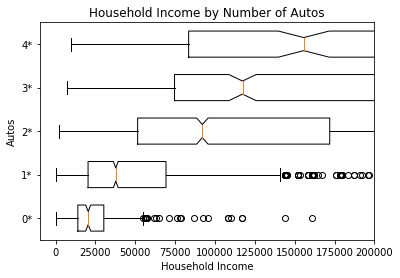

In [11]:
hh_box_2 = list(hh_2.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_2], 
    vert = False, 
    labels = [str(i[0])+"*" for i in hh_box_2], 
    notch = True, 
    widths = 0.6,
)
plt.xlim(-10000,200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');

The median income of households who have 2 cars *and* have a person over 65 is less than 
for all households with 2 cars.
The exact value can be confirmed numerically:

In [12]:
hh_2[hh_2.autos == 2].income.median()

92100.0

While more complicated to draw, iterleaving both sets of boxplots
in the same plot makes comparisons between the full population and
the set of households with at least one person over 65 even easier to see:

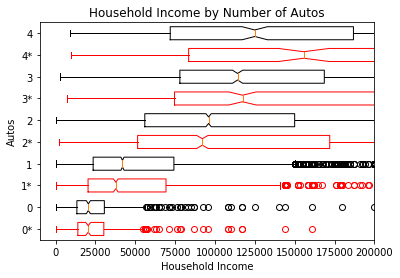

In [13]:
plt.boxplot(
    [i[1] for i in hh_box_1], 
    vert = False, 
    labels = [i[0] for i in hh_box_1], 
    notch = True, 
    widths = 0.6,
    positions = range(2, (len(hh_box_2))*2+2, 2),
)

hh_box_2 = list(hh_2.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_2], 
    vert = False, 
    labels = [str(i[0])+"*" for i in hh_box_2], 
    notch = True, 
    widths = 0.6,
    positions = range(1, (len(hh_box_2))*2+1, 2),
    boxprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    capprops=dict(color="red"),
    flierprops=dict(markeredgecolor="red"),
)
plt.xlim(-10000,200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');